In [2]:
!pip install pandas

In [5]:
!pip install numpy

In [7]:
!pip install nltk

In [21]:
!pip install tensorflow keras nltk

In [22]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
dataset_path = "/content/drive/MyDrive/Fake Real News /news.csv"
df = pd.read_csv(dataset_path)

In [12]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [23]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Encode labels (FAKE = 0, REAL = 1)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Split into features & labels
X = df['text'].values
y = df['label'].values

In [25]:
# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=300, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [26]:
# Define model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),  # Word Embeddings
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train LSTM model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7303 - loss: 0.7147 - val_accuracy: 0.7664 - val_loss: 0.5649
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8104 - loss: 0.4154 - val_accuracy: 0.8248 - val_loss: 0.4428
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9035 - loss: 0.2521 - val_accuracy: 0.8256 - val_loss: 0.4730
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9065 - loss: 0.2381 - val_accuracy: 0.8374 - val_loss: 0.4772
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9115 - loss: 0.2285 - val_accuracy: 0.8248 - val_loss: 0.5088


In [32]:
# Evaluate accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.8359 - loss: 0.4534
Model Accuracy: 0.8248


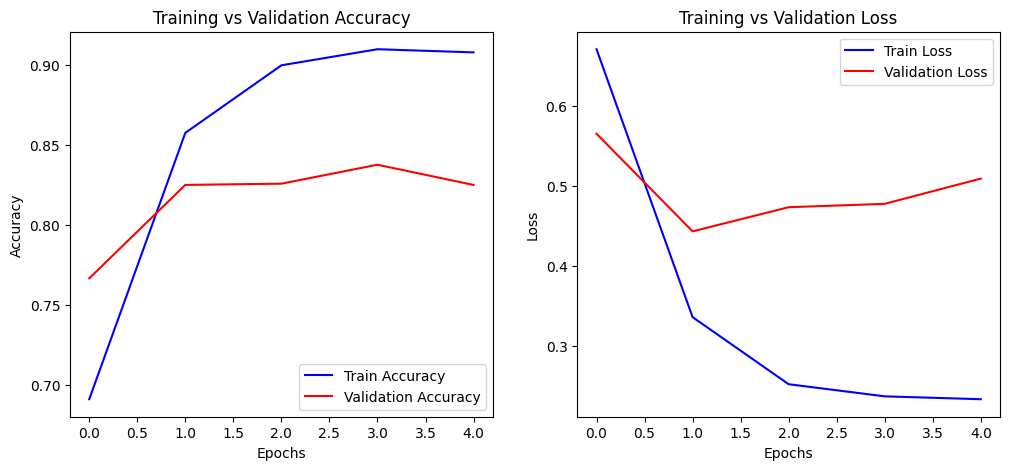

In [33]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()